# Read about the data
Go to the data URL on LearnIT and read what the data is about in general. You can also explore the metadata file without downloading the data.

# Explore the metadata
Load and explore the metadata file provided by the dataset. You can for example look at the number of samples per class in the "diagnostic" column, but also look more into the patients characteristics with the distribution of the "gender" and "age" columns. Finally you can check the quality of your data by looking at the presence of missing values.

In [1]:
import pandas as pd

df = pd.read_csv('../data/metadata_with_group.csv')
df.head()
#Exploration and analysis (distribution, missing values, etc...)

,Unnamed: 0,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,...,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,group_id
0,0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,...,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False,N
1,1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,...,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True,C
2,2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,...,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False,Q
3,3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,...,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False,I
4,4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,...,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True,B


### Exploratory data analysis on metadata. What can be done (these are just suggestions, you can explore data in your own ways as well):

1. **Data Loading** - Reading the CSV file
2. **Basic Inspection** - First rows, shape, info
3. **Statistical Summary** - Descriptive statistics
4. **Missing Data Analysis** - Count and visualization
5. **Data Types** - Understanding column types
6. **Categorical Analysis** - Unique values and distributions
7. **Numerical Analysis** - Distributions with histograms
8. **Duplicate Detection**
9. **Correlation Analysis** - Matrix and heatmap
10. **Target Variable Analysis** - Diagnostic categories
11. **Group Analysis** - Group distributions
12. **Cross-tabulation** - Relationships between features

DATASET OVERVIEW


Dataset shape: 2103 rows, 27 columns

Columns: ['patient_id', 'lesion_id', 'smoke', 'drink', 'background_father', 'background_mother', 'age', 'pesticide', 'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water', 'has_sewage_system', 'fitspatrick', 'region', 'diameter_1', 'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed', 'elevation', 'img_id', 'biopsed', 'group_id']
DATA TYPES

patient_id              object
lesion_id                int64
smoke                   object
drink                   object
background_father       object
background_mother       object
age                      int64
pesticide               object
gender                  object
skin_cancer_history     object
cancer_history          object
has_piped_water         object
has_sewage_system       object
fitspatrick            float64
region                  object
diameter_1             float64
diameter_2             float64
diagnostic              object
itch    

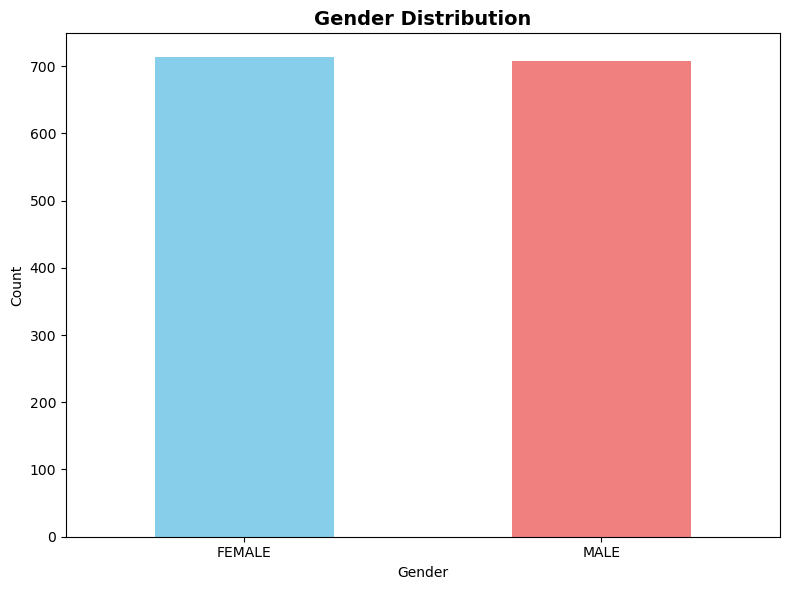


Age Statistics:
count    2103.000000
mean       60.655254
std        15.918248
min         6.000000
25%        52.000000
50%        62.000000
75%        72.000000
max        94.000000
Name: age, dtype: float64


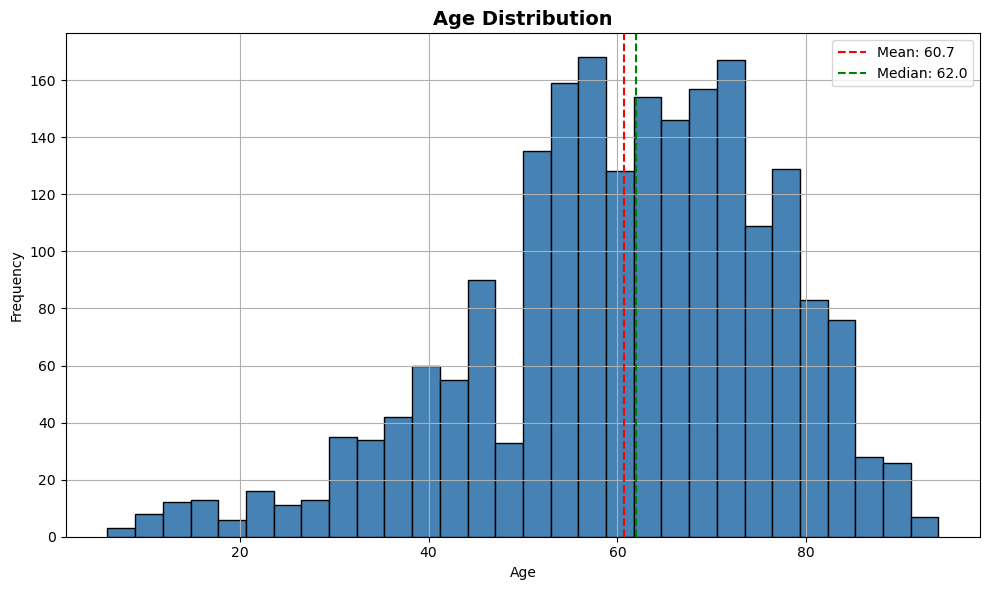


Diagnostic Distribution:
diagnostic
BCC    815
ACK    634
NEV    220
SEK    201
SCC    184
MEL     49
Name: count, dtype: int64


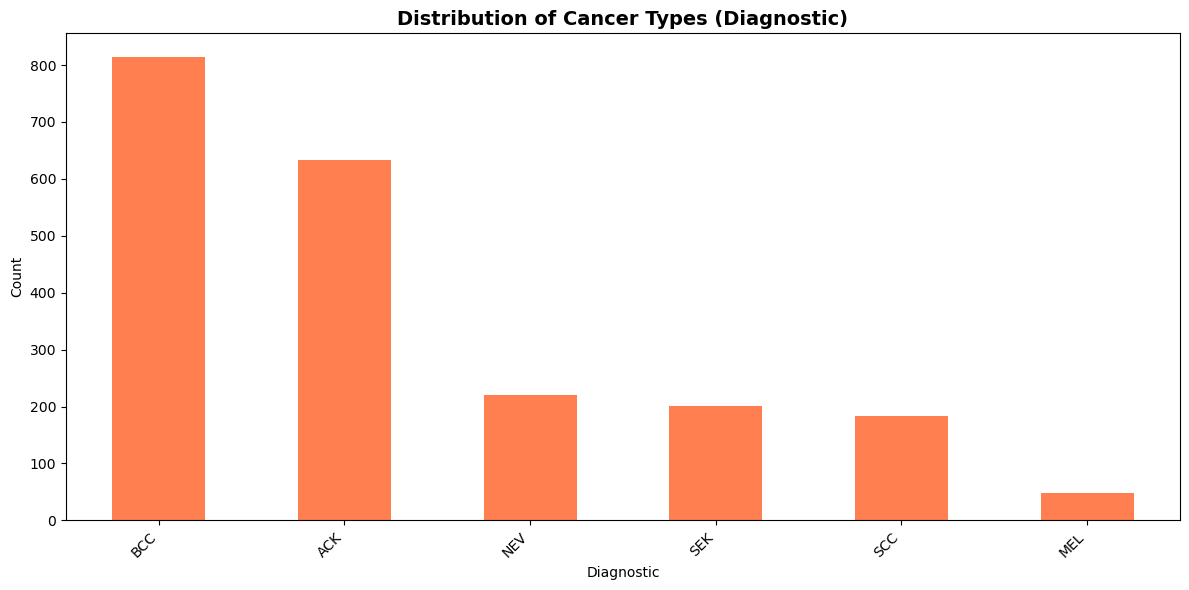

C:\Users\jadbi\AppData\Local\Temp\ipykernel_19660\1805099605.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diagnostic', y='age', ax=axes[1], palette='Set2')


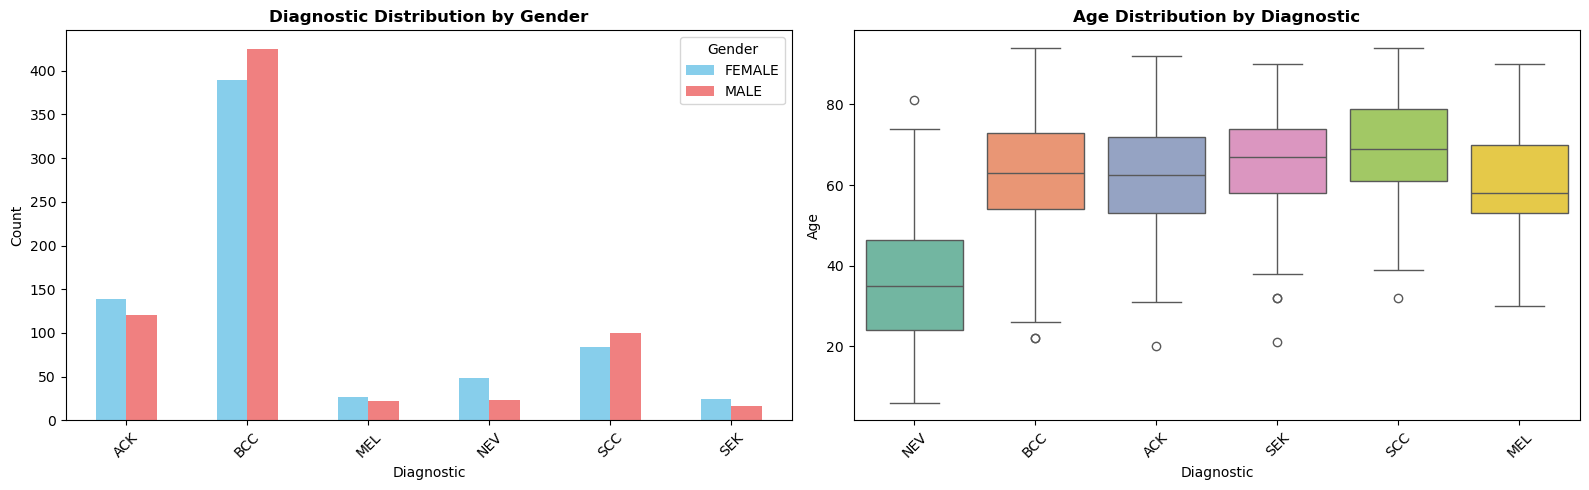

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = df.drop(columns=['Unnamed: 0'])

# Step 1: Dataset Overview

print("DATASET OVERVIEW\n")

print(f"\nDataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nColumns: {list(df.columns)}")

# Step 2: Data Types

print("DATA TYPES\n")

print(df.dtypes)

# Step 3: Missing Values Analysis

print("MISSING VALUES ANALYSIS\n")

missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

# Step 4: Summary Statistics

print("SUMMARY STATISTICS\n")

print(df.describe())

# Step 5: Categorical Features Overview

print("CATEGORICAL FEATURES\n")

categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
for col in categorical_columns:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())

# Step 6: Duplicates Check
duplicates = df.duplicated().sum()

print("DUPLICATES")

print(f"Number of duplicate rows: {duplicates}\n")


print("VISUALIZATIONS\n")


# Gender Distribution
if 'gender' in df.columns:
    print("\nGender Distribution:")
    print(df['gender'].value_counts())
    
    plt.figure(figsize=(8, 6))
    df['gender'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
    plt.title('Gender Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Age Distribution
if 'age' in df.columns:
    print("\nAge Statistics:")
    print(df['age'].describe())
    
    plt.figure(figsize=(10, 6))
    df['age'].hist(bins=30, edgecolor='black', color='steelblue')
    plt.title('Age Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.axvline(df['age'].mean(), color='red', linestyle='--', label=f'Mean: {df["age"].mean():.1f}')
    plt.axvline(df['age'].median(), color='green', linestyle='--', label=f'Median: {df["age"].median():.1f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Diagnostic (Cancer Type) Distribution
if 'diagnostic' in df.columns:
    print("\nDiagnostic Distribution:")
    print(df['diagnostic'].value_counts())
    
    plt.figure(figsize=(12, 6))
    diagnostic_counts = df['diagnostic'].value_counts()
    diagnostic_counts.plot(kind='bar', color='coral')
    plt.title('Distribution of Cancer Types (Diagnostic)', fontsize=14, fontweight='bold')
    plt.xlabel('Diagnostic')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Diagnostic vs Gender and Diagnostic vs Age
if 'diagnostic' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # 1. Diagnostic vs Gender
    if 'gender' in df.columns:
        crosstab = pd.crosstab(df['diagnostic'], df['gender'])
        crosstab.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral'])
        axes[0].set_title('Diagnostic Distribution by Gender', fontsize=12, fontweight='bold')
        axes[0].set_xlabel('Diagnostic')
        axes[0].set_ylabel('Count')
        axes[0].legend(title='Gender')
        axes[0].tick_params(axis='x', rotation=45)
    
    # 2. Diagnostic vs Age
    if 'age' in df.columns:
        sns.boxplot(data=df, x='diagnostic', y='age', ax=axes[1], palette='Set2')
        axes[1].set_title('Age Distribution by Diagnostic', fontsize=12, fontweight='bold')
        axes[1].set_xlabel('Diagnostic')
        axes[1].set_ylabel('Age')
        axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Download the images and unzip the files
The data consists of images and segmentations masks, URLs are on LearnIT

# Organize the files
The CSV file on LearnIT (last column) says which images your group should use. You can choose to delete the other images for now. It also contains the other metadata from the original dataset.

Organize the files such that you have the same structure as on the exam template (https://github.com/purrlab/ProjectInDataScience2026_ExamTemplate)

There is a script to help you on the Exercises Github.

In [4]:
import shutil
from pathlib import Path

#Define paths to data and the group ID to get the data for
GROUP_ID = "C"
PATH_RAW = Path("./data")
PATH_PROCESSED = Path("./data/group_data")
PATH_IMGS = PATH_PROCESSED/"imgs/"
PATH_MASKS = PATH_PROCESSED/"masks/"

#Create the subfolders to save the data into
PATH_PROCESSED.mkdir(parents=True, exist_ok=True)
PATH_IMGS.mkdir(parents=True, exist_ok=True)
PATH_MASKS.mkdir(parents=True, exist_ok=True)

#Load the csv and filter it to only keep the samples assigned to the specified group
df_labels = pd.read_csv(f"../data/metadata_with_group.csv")
df_labels_group = df_labels[df_labels["group_id"]==GROUP_ID]

#For each image assigned to the group, copy it and its mask to the group_data folder
for img_path in df_labels_group["img_id"]:
    try:
        shutil.copyfile(f"{PATH_RAW}/imgs/{img_path}", f"{PATH_IMGS}/{img_path}")
        shutil.copyfile(f"{PATH_RAW}/masks/{img_path.replace('.png','_mask.png')}", f"{PATH_MASKS}/{img_path.replace('.png','_mask.png')}")
    except FileNotFoundError as e:
        continue

#Save the filtered metadata files in the group_data folder
df_labels_group.to_csv(f"{PATH_PROCESSED}/metadata.csv")

# Loading images and masks
Extend the example below so that you can load an image with a specific patient_id and lesion_id in the metadata.csv file, and display them side by side.

This is the simplest way do it, you are also allowed to use for example the PIL library.

Add a title to the plot which displays the diagnostic (and other variables you might be interested in), this will help with exploring the images.

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

#chose patient
patient_id = 'PAT_106'
lesion_id = 159

#filter from metadata
df_metadata = pd.read_csv(f"./data/group_data/metadata.csv")

sample = df_metadata[(df_metadata['patient_id'] == patient_id) & 
                     (df_metadata['lesion_id'] == lesion_id)]

#check
if len(sample) == 0:
    print(f"No sample found for patient_id={patient_id} and lesion_id={lesion_id}")
else:
    #get the image filename
    img_filename = sample['img_id'].values[0]
    
    #load image and mask
    img_path = PATH_IMGS / img_filename
    mask_path = PATH_MASKS / img_filename.replace('.png', '_mask.png')
    
    #read image and mask with plt
    img = plt.imread(img_path)
    mask = plt.imread(mask_path)

    #read image and mask with pil
    # img = Image.open(img_path)
    # mask = Image.open(mask_path)  
    
    #patient information for title
    diagnostic = sample['diagnostic'].values[0]
    age = sample['age'].values[0]
    gender = sample['gender'].values[0]
    region = sample['region'].values[0]
    
    #display side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    #display image
    axes[0].imshow(img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    #display mask
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Segmentation Mask')
    axes[1].axis('off')
    
    #add overall title for the figure
    fig.suptitle(f'Patient: {patient_id} | Lesion: {lesion_id} | Diagnostic: {diagnostic}\n'
                 f'Age: {age} | Gender: {gender} | Region: {region}', 
                 fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

#check for mask imperfections, note down differences between cancerous and non-cancerous lesions

No sample found for patient_id=PAT_106 and lesion_id=159


# Loading multiple images
Write code such that you read in a specified number (say 10) images from the metadata file. You can select the images randomly for now, but you can also select them according to a specific variable (such as the age of the patient). Display the images and their masks side by side.

In [6]:
# Function to load and display image and mask for a single sample
def display_image_and_mask(sample, ax_img, ax_mask, show_title=True):

    img_filename = sample['img_id'].values[0] if isinstance(sample, pd.DataFrame) else sample['img_id']
    
    img_path = PATH_IMGS / img_filename
    mask_path = PATH_MASKS / img_filename.replace('.png', '_mask.png')
    
    if not img_path.exists():
        ax_img.text(0.5, 0.5, 'Image not found', ha='center', va='center')
        ax_img.axis('off')
        ax_mask.axis('off')
        return False

    img = plt.imread(img_path)
    mask = plt.imread(mask_path) if mask_path.exists() else np.zeros_like(img)

    ax_img.imshow(img)
    ax_img.axis('off')
    
    ax_mask.imshow(mask, cmap='gray')
    ax_mask.axis('off')

    patient_id = sample['patient_id'].values[0] if isinstance(sample, pd.DataFrame) else sample['patient_id']
    diagnostic = sample['diagnostic'].values[0] if isinstance(sample, pd.DataFrame) else sample['diagnostic']
    age = sample['age'].values[0] if isinstance(sample, pd.DataFrame) else sample['age']
    
    ax_img.set_title(f'P: {patient_id}\nDx: {diagnostic}, Age: {age}', fontsize=8)
    ax_mask.set_title('Mask', fontsize=8)
    
    return True


Displaying 4 images using 'oldest' selection method


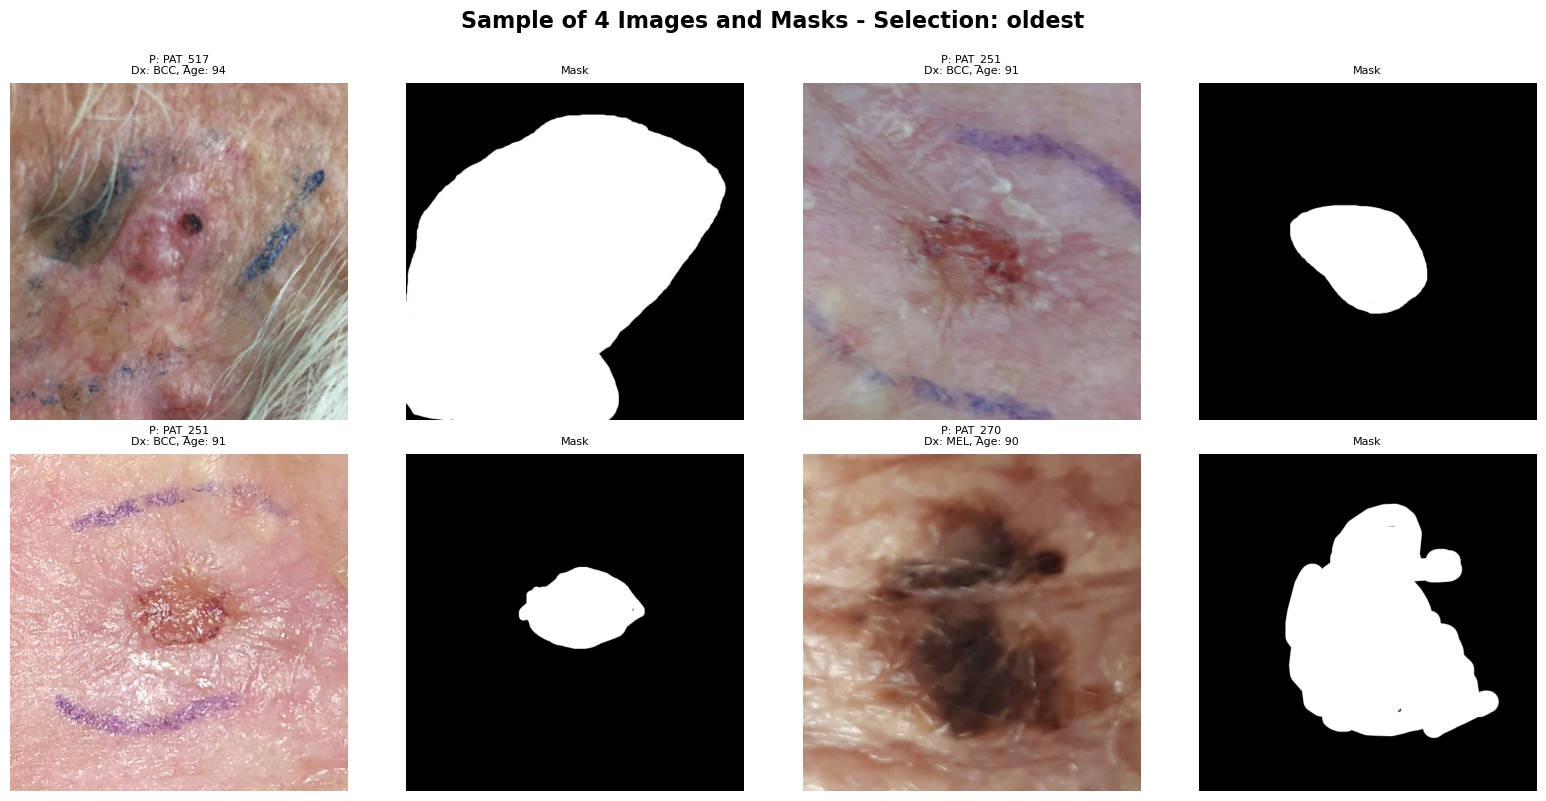


Summary of selected samples:
Diagnostic distribution:
diagnostic
BCC    3
MEL    1
Name: count, dtype: int64

Age range: 90 - 94


In [7]:
# load metadata
df_metadata = pd.read_csv(f"{PATH_PROCESSED}/metadata.csv")

# number of images to display
num_images = 4
selection_method = 'oldest'  # Options: 'random', 'oldest'

# Select samples based on method
if selection_method == 'random':
    selected_samples = df_metadata.sample(n=num_images, random_state=42)
elif selection_method == 'oldest':
    selected_samples = df_metadata.nlargest(num_images, 'age')
else:
    selected_samples = df_metadata.head(num_images)

print(f"Displaying {len(selected_samples)} images using '{selection_method}' selection method")

# 2 columns per image: image + mask
rows = (len(selected_samples) + 1) // 2  # round up for odd numbers
cols = 4  # 2 images per row (each with image + mask)

fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten() if len(selected_samples) > 1 else [axes]

for idx, (_, sample) in enumerate(selected_samples.iterrows()):
    ax_img = axes[idx * 2]
    ax_mask = axes[idx * 2 + 1]
    display_image_and_mask(sample, ax_img, ax_mask, show_title=True)

for idx in range(len(selected_samples) * 2, len(axes)):
    axes[idx].axis('off')

plt.suptitle(f'Sample of {len(selected_samples)} Images and Masks - Selection: {selection_method}', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

#summary statistics
print(f"\nSummary of selected samples:")
print(f"Diagnostic distribution:\n{selected_samples['diagnostic'].value_counts()}")
print(f"\nAge range: {selected_samples['age'].min():.0f} - {selected_samples['age'].max():.0f}")

# Write a summary
After the group discussion, write a summary with a few paragraphs about the dataset in general (based on your reading of the dataset paper), and describing your findings about the images and metadata (bullet points are OK). You can also show examples of images to explain what you mean.

The summary forms part of the preliminary assignment, so you have some time to finish it.

We will use Overleaf/LaTeX for the final report, but for this assignment you can just use Word and save as PDF.